## Overview of the Project ##

- The dataset contains <b>1460 rows and 81 columns</b> and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- 19 columns were identified as having NULL values, out of which 4 columns have more than 70 percent were NULL, which were dropped
* We ran a <b>Heat Map</b> to check for Variable Co-relation . We have minimal co-relation which is good
* We ran check for outliers and acted on that data as appropriate. <b>Removed LotArea greater than 50,000 sq. ft</b>
* Created New Features for <b>Total Square Feet</b>.
- Adjusted for Inflation using <b>CPI package </b>
- Created a <b>data pipeline for Numerical and Categorical Features </b>which did the following:
    - Scalers to scale the data to better fit the model
    - Ran One Hot Encoding on categorical data
- Finally executed <b>Linear Regression, Ridge and XG Boost</b> to train the Model using <b>GridSearchCV</b> to test multiple parameters.
- Identified <b> Linear Regression </b> as the best performing model by comparing the results and persisted it to apply on test data.
- We predicted on our WISH LIST of houses to get the predictions.
- We also downloaded the latest housing data sets for <b>Newark-DE, Wilmington-DE, Bear-DE and Ames-IA</b> and used the saved model to predict the house prices.
- A web app was developed using Streamlit and deployed to Heroku which can be accessed using:
    - url


### Summary of the R2 Squares and Mean Absolute Errors

### Conclusion

### Initial Data Analysis
- The dataset contains 1460 rows and 81 columns and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- Executed Describe, info() to find the type of data and 19 columns were identified as having NULL values
- Out of 19, 4 columns having more than 70 percent NULLs were dropped
- Correlation ----- to be added, describe the trends and collinearity
- ------High, Low , mean for the columns which we selected

### Inflation Adjustment
- Installed and imported the cpi package
- Used Year sold and the current Price to get the Adjusted SalesPrice.


### Data Cleansing
- Out of 19 which had nulls, 4 columns having more than 70 percent NULLs were dropped
- Ran box plot for finding outliers and LotArea greater than 50,000 sq.ft. were eliminated
- Plotted histogram for the columns: LotArea,BldgType,HouseStyle,YearBuilt,FullBath,HalfBath,BedroomAbvGr  ---- to be added, observations
- Ploted boxplot: to be added , observations
- relationships of columns with SalesPrice - scatterplots

### Imputers
- No data elements were NULLs and so nothing was

### PCA
- we will have to do a PCA to pick the top features

### Feature Engineering
- Added Total Square Feet which is total of Basement, 1st and 2nd floor square feet.

### Data Pre-processing pipeline
- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

### Model Training, Tuning & Evaluation
### Final Selection of Model
### Prediction using the test datasets

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm, skew
from IPython.display import display, HTML

import seaborn as sns
from sklearn import metrics

import xgboost as xgb

import cpi
cpi.update()

### Data Set

In [21]:
housingData=pd.read_csv('Data/housing.csv')
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic EDA

- The dataset has shape of 1460x81 and has 43 numerical and 38 categorical columns
- Few of the numerical columns can be interpreted as categorical features such as OverallQual, OverallCond, # of Baths, Kitchens, years.
- Few of the fields have more than 80% as single value in the data and should be careful while using these as it will skew the results.
    - MSZoning, LandContour, LandSlope, BldgType etc.

In [22]:
housingData.shape

(1460, 81)

In [23]:
# divide data into categorical and numerical features
cat, num = [], []
for i in housingData.columns:
    d = housingData.dtypes[i]
    if d == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: {}".format(cat))
print("\n")
print("------------------------------------------------------------------------------------")
print("\n")
print("Numerical: {}".format(num))

Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


------------------------------------------------------------------------------------


Numerical: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Kitch

In [24]:
# Checking length of categorical and numerical
print("Length of categorical: {}".format(len(cat)))
print("Length of numerical: {}".format(len(num)))

Length of categorical: 43
Length of numerical: 38


In [25]:
# Referred from kaggle (https://www.kaggle.com/stefanschulmeister87/visual-data-inspection-and-xgboost)

column_informations = {}
num_values = len(housingData)
for col in housingData.columns:
    num_unique = housingData[col].nunique()
    num_nulls = round(housingData[col].isna().sum()/num_values,2)
    d_type = housingData.dtypes[col]
    
    if (num_unique < 30):
        # discrete column
        info_str = "["
        value_counts = housingData[col].value_counts()
        single_value_weight = round(value_counts.iloc[0] / num_values, 2)
        for index, value in value_counts.items():
            info_str += f"{value} X {index}, "
        column_informations[col] = {"d_type":d_type, "discret": True, "percentage_of_missing_values": num_nulls, "single_value_weight": single_value_weight,
                                    "min": 0.0, "max": 0.0, "mean": 0.0, "median": 0.0, "info_str": info_str[:-2] + "]"} 
    else:
        # continuous column
        if d_type == "int64" or d_type == "float64":
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "single_value_weight": 0.0,
                                        "min": housingData[col].min(), "max": housingData[col].max(), "mean": round(housingData[col].mean(), 2),
                                        "median": round(housingData[col].median(), 2), "info_str": ""}
        else:
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "min": "-", "max": "-",
                                        "mean": "-", "median": "-", "info_str": ""}

# build DataFrame from dictionary
info_df = pd.DataFrame.from_dict(column_informations, orient='index')

### Discrete Columns Information

In [26]:
display(HTML(info_df[info_df["discret"]==True][["d_type", "percentage_of_missing_values", "single_value_weight", "info_str"]].to_html()))
print(len(info_df[info_df["discret"]==True]))

,d_type,percentage_of_missing_values,single_value_weight,info_str
MSSubClass,int64,0.00,0.37,"[536 X 20, 299 X 60, 144 X 50, 87 X 120, 69 X 30, 63 X 160, 60 X 70, 58 X 80, 52 X 90, 30 X 190, 20 X 85, 16 X 75, 12 X 45, 10 X 180, 4 X 40]"
MSZoning,object,0.00,0.79,"[1151 X RL, 218 X RM, 65 X FV, 16 X RH, 10 X C (all)]"
Street,object,0.00,1.00,"[1454 X Pave, 6 X Grvl]"
Alley,object,0.94,0.03,"[50 X Grvl, 41 X Pave]"
LotShape,object,0.00,0.63,"[925 X Reg, 484 X IR1, 41 X IR2, 10 X IR3]"
LandContour,object,0.00,0.90,"[1311 X Lvl, 63 X Bnk, 50 X HLS, 36 X Low]"
Utilities,object,0.00,1.00,"[1459 X AllPub, 1 X NoSeWa]"
LotConfig,object,0.00,0.72,"[1052 X Inside, 263 X Corner, 94 X CulDSac, 47 X FR2, 4 X FR3]"
LandSlope,object,0.00,0.95,"[1382 X Gtl, 65 X Mod, 13 X Sev]"
Neighborhood,object,0.00,0.15,"[225 X NAmes, 150 X CollgCr, 113 X OldTown, 100 X Edwards, 86 X Somerst, 79 X Gilbert, 77 X NridgHt, 74 X Sawyer, 73 X NWAmes, 59 X SawyerW, 58 X BrkSide, 51 X Crawfor, 49 X Mitchel, 41 X NoRidge, 38 X Timber, 37 X IDOTRR, 28 X ClearCr, 25 X SWISU, 25 X StoneBr, 17 X Blmngtn, 17 X MeadowV, 16 X BrDale, 11 X Veenker, 9 X NPkVill, 2 X Blueste]"


61


### Continuous Columns Information

In [27]:
display(HTML(info_df[info_df["discret"]==False][["d_type", "percentage_of_missing_values", "min", "max", "mean", "median"]].to_html()))
print(len(info_df[info_df["discret"]==False]))

,d_type,percentage_of_missing_values,min,max,mean,median
Id,int64,0.00,1.0,1460.0,730.50,730.5
LotFrontage,float64,0.18,21.0,313.0,70.05,69.0
LotArea,int64,0.00,1300.0,215245.0,10516.83,9478.5
YearBuilt,int64,0.00,1872.0,2010.0,1971.27,1973.0
YearRemodAdd,int64,0.00,1950.0,2010.0,1984.87,1994.0
MasVnrArea,float64,0.01,0.0,1600.0,103.69,0.0
BsmtFinSF1,int64,0.00,0.0,5644.0,443.64,383.5
BsmtFinSF2,int64,0.00,0.0,1474.0,46.55,0.0
BsmtUnfSF,int64,0.00,0.0,2336.0,567.24,477.5
TotalBsmtSF,int64,0.00,0.0,6110.0,1057.43,991.5


20


In [29]:
fig = plt.figure(figsize=(25,7))
sns.histplot(data = housingData,x="SalePrice", kde=True, bins=100, palette="Set2", multiple="stack").set_title('SalePrice Distribution', fontdict= {'fontsize': 24});

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 1800x504 with 0 Axes>

### Adjust for inflation using CPI

- Use YrSold and SalePrice to adjust the dollar to current date.

In [30]:
housingData['ADJUSTED_SalesPrice'] = housingData.apply(lambda x: cpi.inflate(x.SalePrice, x.YrSold), axis=1)

### Find missing Data

- 19 columns have missing data
- Alley, PoolQC, Fence and MiscFeature have more than 70% missing values so we decided to drop these fields.

In [31]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [32]:
miss_df = find_missing_percent(housingData)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")

print("Number of columns with missing values:"+(str(miss_df[miss_df['PercentMissing']>0.0].shape[0])))

,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
6,Alley,1369.0,93.77
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07




Number of columns with missing values:19


In [33]:
drop_cols = miss_df[miss_df['PercentMissing'] >70.0].ColumnName.tolist()

print("Number of columns with more than 70%:"+ str(len(drop_cols)))
housingData = housingData.drop(drop_cols,axis=1)
#test = test.drop(drop_cols,axis =1)

miss_df = miss_df[miss_df['ColumnName'].isin(housingData.columns)]
'''Columns to Impute'''
impute_cols = miss_df[miss_df['TotalMissingVals']>0.0].ColumnName.tolist()
miss_df[miss_df['TotalMissingVals']>0.0]

Number of columns with more than 70%:4


,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07
57,FireplaceQu,690.0,47.26


### Basic Stats

- Few Observations
- The 

In [34]:
housingData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.25000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.00000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.00000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.50000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.00000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.00000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.00000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.00000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.00000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.25000,5644.000000


#### Following were the observations for LotArea and checking for Distribution and Box plot for outliers:
* Run a HISTOGRAM on LotArea as that is typically the most import for a price! Run for where value is not null
* Histogram to see the frequency ranges and it shows 500 sq as most common
* Run a Distribution plot to validate the same
* Run a BOX PLOT which is very important to check for OUTLIERS

In [35]:
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(housingData['LotArea'], kde=True)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 720x432 with 0 Axes>

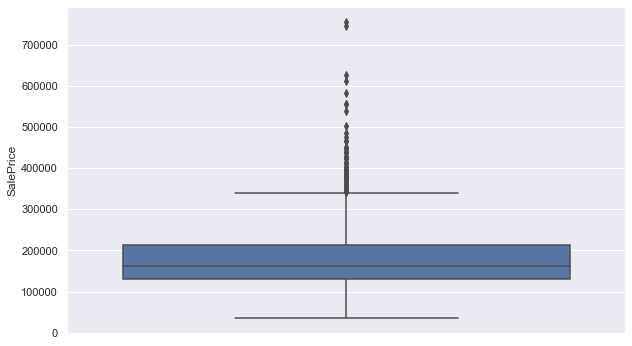

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(y='SalePrice',data=housingData)
plt.show()

### Removing Outlier

In order to avoid outliers, LotArea greater than 50,000 sq.ft. were eliminated 

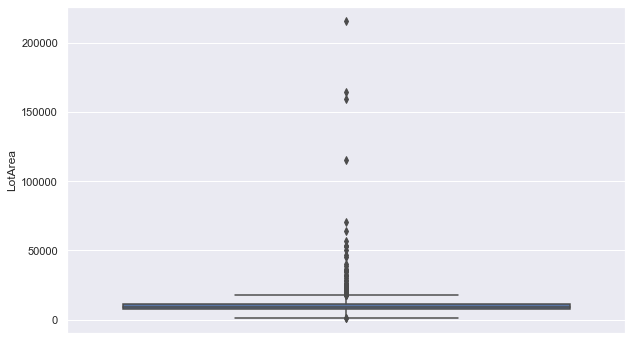

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LotArea',data=housingData)
plt.show()

Text(0, 0.5, 'SalePrice')

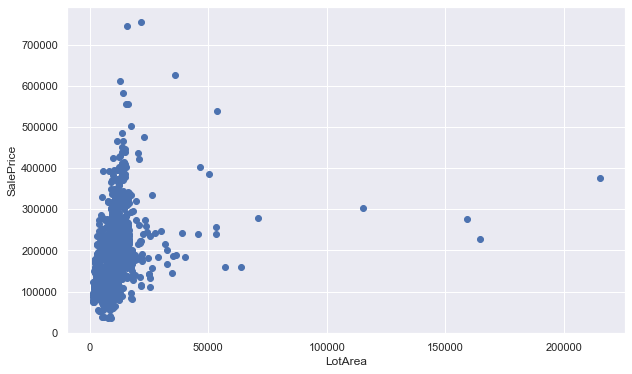

In [38]:
# Analysing the LotArea Feature against SalePrice
plt.figure(figsize=(10,6))
plt.scatter(housingData.LotArea, housingData.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
# it shows outliers in it

In [39]:
# Dropping lotArea greater than 50000 to remove outlier 
housingData = housingData[housingData.LotArea <= 50000].copy()
housingData.shape

(1449, 78)

Text(0, 0.5, 'SalePrice')

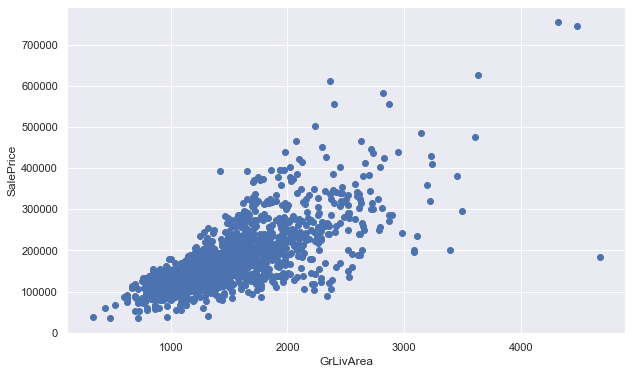

In [40]:
# Observing the Column output GrLivArea against Output SalePrice
# To check for outliers
plt.figure(figsize=(10,6))
plt.scatter(housingData.GrLivArea, housingData.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Attribute Correlation Metrics

- 

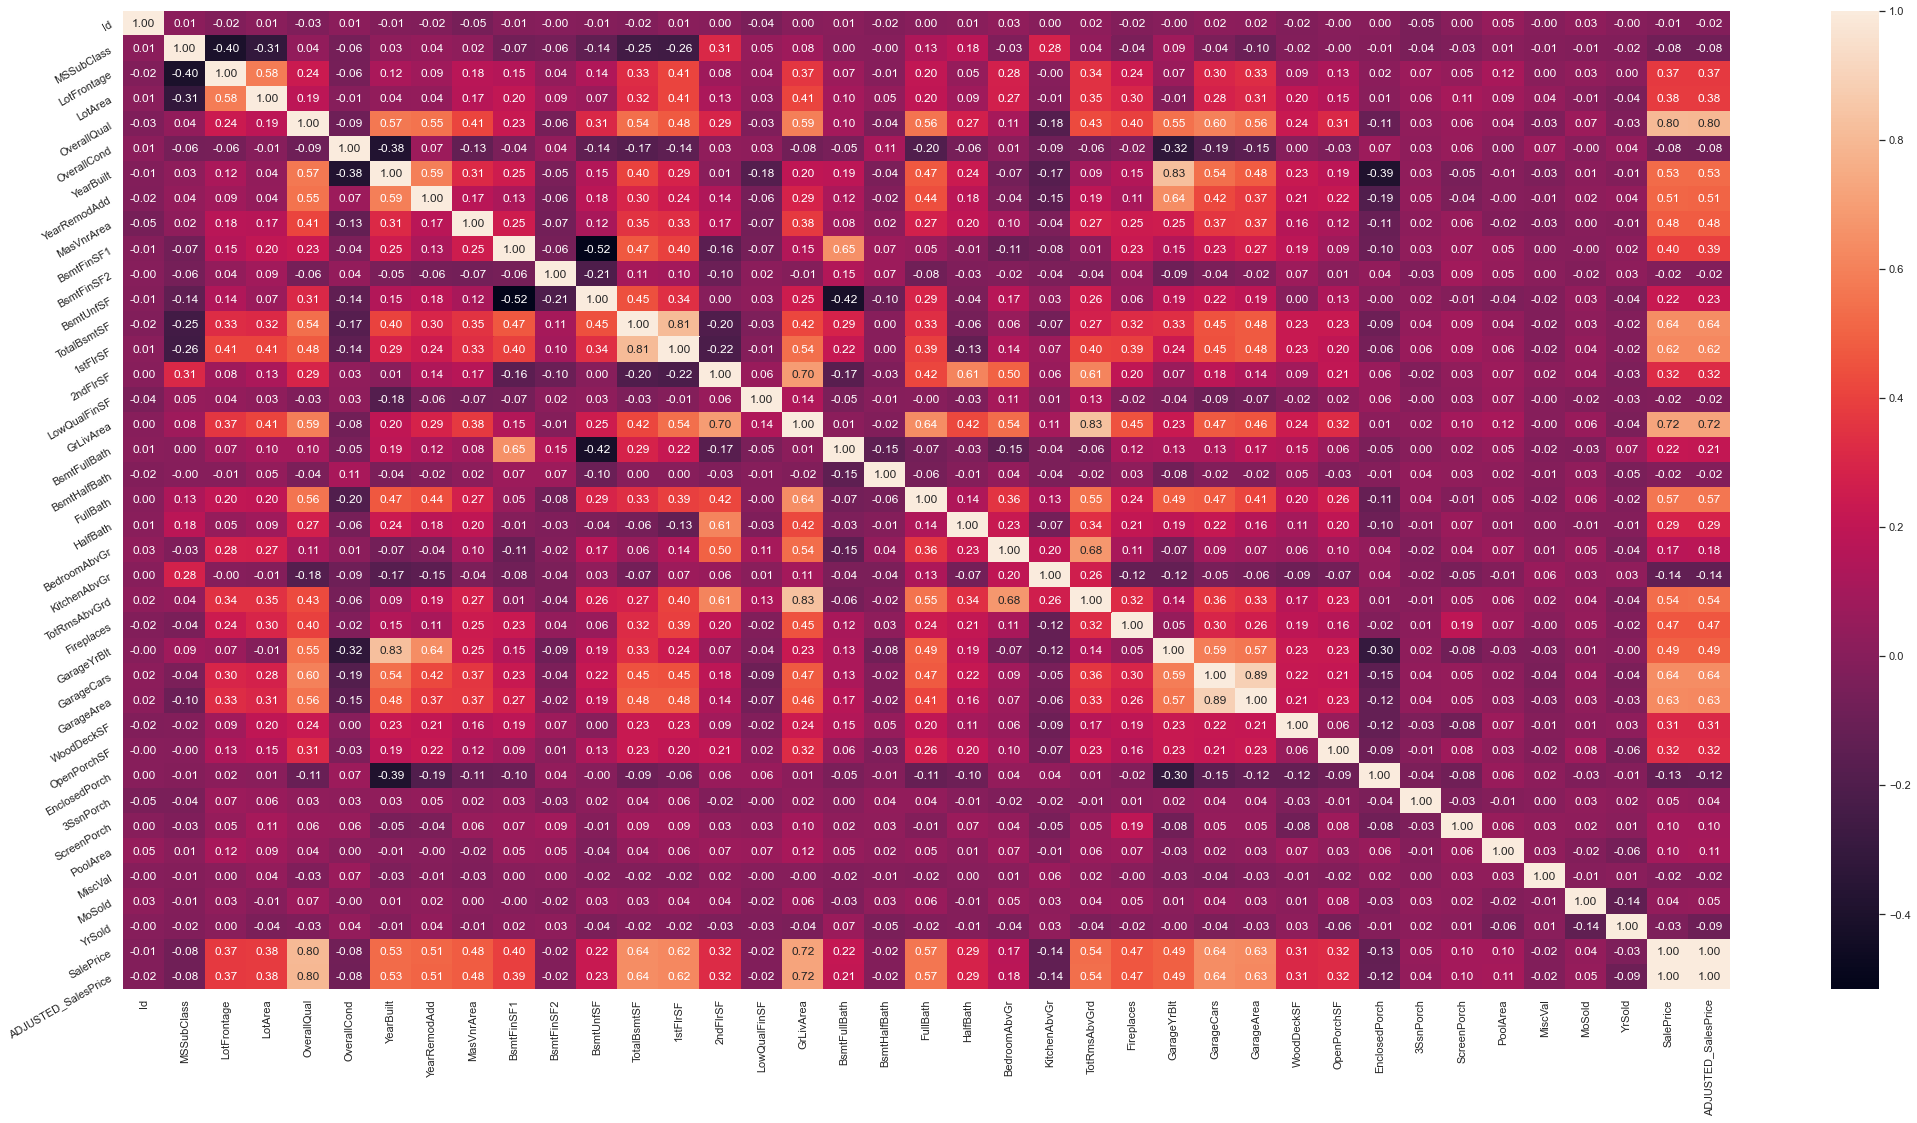

In [41]:
corr = housingData.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(36,18))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [42]:
number_of_price_groups = 5
number_of_values_per_group = len(housingData)/number_of_price_groups

visual_df = housingData.copy()
visual_df.sort_values(by=['SalePrice'], inplace=True, ignore_index=True)

# get group ranges (we want the same amount of members in each group)
last_boundary = 0
bounder_dict={}
for i in range(number_of_price_groups):
    boundary = visual_df.iloc[int((i+1)*number_of_values_per_group) - 1]["SalePrice"]
    bounder_dict[f"{last_boundary}-{boundary}"] = [last_boundary, boundary]
    last_boundary = boundary

def get_price_group(price, bounder_dict):
    group_lable = "-"
    for group in bounder_dict.keys():
        if bounder_dict[group][0] < price <= bounder_dict[group][1]:
            group_lable=group
    return group_lable
    
visual_df["PriceGroup"]=visual_df["SalePrice"].map(lambda x: get_price_group(x, bounder_dict));

In [43]:
# let's check:
indexs =[]
for group in visual_df["PriceGroup"].unique():
    indexs.append(visual_df[["SalePrice", "PriceGroup"]][visual_df["PriceGroup"]==group].head(1).index[0])
visual_df.loc[indexs][["SalePrice", "PriceGroup"]]

,SalePrice,PriceGroup
0,34900,0-123600
289,124000,123600-146500
579,146800,146500-178900
869,179000,178900-229000
1159,229456,229000-755000


- For visualization, it will be good to group the prices onto manageable levels.
- The above groups look good

In [44]:
date_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
info_df.loc[date_features]

,d_type,discret,percentage_of_missing_values,single_value_weight,min,max,mean,median,info_str
YearBuilt,int64,False,0.00,0.00,1872.0,2010.0,1971.27,1973.0,
YearRemodAdd,int64,False,0.00,0.00,1950.0,2010.0,1984.87,1994.0,
GarageYrBlt,float64,False,0.06,0.00,1900.0,2010.0,1978.51,1980.0,
MoSold,int64,True,0.00,0.17,0.0,0.0,0.00,0.0,"[253 X 6, 234 X 7, 204 X 5, 141 X 4, 122 X 8, ..."
YrSold,int64,True,0.00,0.23,0.0,0.0,0.00,0.0,"[338 X 2009, 329 X 2007, 314 X 2006, 304 X 200..."


AttributeError: module 'seaborn' has no attribute 'histplot'

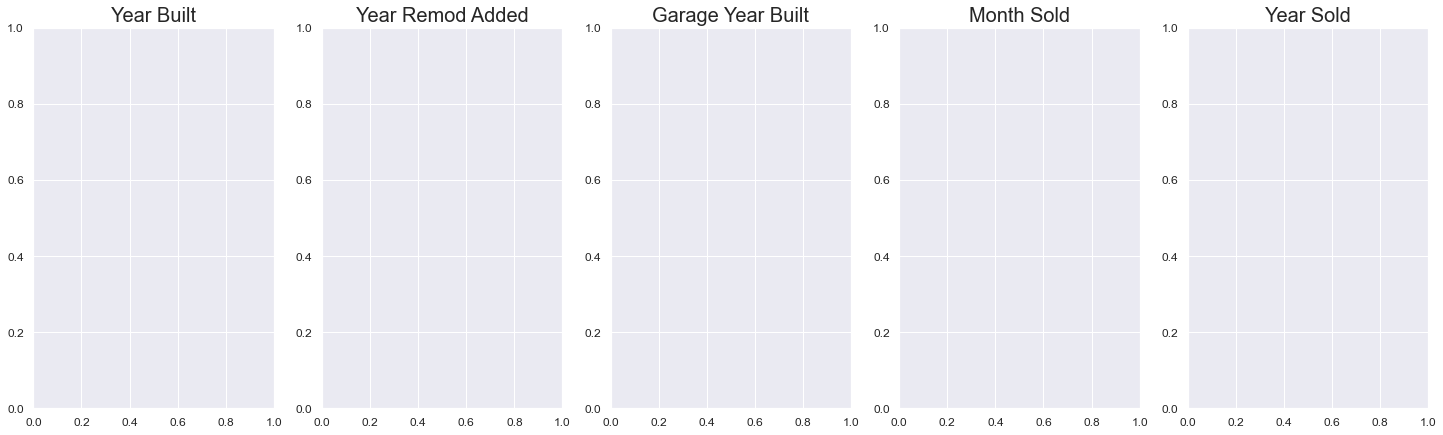

In [45]:
# build figure
fig = plt.figure(figsize=(25,7))

# add grid to figure
gs = fig.add_gridspec(1,5)

# fill grid with subplots
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax03 = fig.add_subplot(gs[0,3])
ax04 = fig.add_subplot(gs[0,4])


# adjust subheadline fontsize
ax00.set_title('Year Built', fontsize=20)
ax01.set_title('Year Remod Added', fontsize=20)
ax02.set_title('Garage Year Built', fontsize=20)
ax03.set_title('Month Sold', fontsize=20)
ax04.set_title('Year Sold', fontsize=20)

# adjust lable fontsize
ax00.tick_params(labelsize=12)
ax01.tick_params(labelsize=12)
ax02.tick_params(labelsize=12)
ax03.tick_params(labelsize=12)
ax04.tick_params(labelsize=12)

# plot (ax=axxx is important)
sns.histplot(data = visual_df,x="YearBuilt", kde=False, ax=ax00, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YearRemodAdd", kde=False, ax=ax01, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="GarageYrBlt", kde=False, ax=ax02, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="MoSold", kde=False, ax=ax03, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YrSold", kde=True, ax=ax04, bins=25, palette="Set2", multiple="stack", hue="PriceGroup");

### Skewness Levels on numerical Features

- Applying skewness, we find that the below fields are highly skewed.

In [46]:
# Checking skewness level on numerical features to remove
skewed_feats = housingData[num].apply(lambda x: skew(x.dropna())).\
sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness ": skewed_feats})
skewness

,Skewness
MiscVal,24.427220
PoolArea,15.882700
3SsnPorch,10.253854
LowQualFinSF,8.966866
KitchenAbvGr,4.464409
BsmtFinSF2,4.284977
ScreenPorch,4.129883
BsmtHalfBath,4.113098
EnclosedPorch,3.073602
MasVnrArea,2.693526


- We will not remove outliers from every feature as it may affect the model since test set will have outliers too and our model needs to be robust against them

### Adding new feature

In [47]:
# Adding one extra feature -> total sqfootage feature 
housingData['TotalSF'] = housingData['TotalBsmtSF'] + housingData['1stFlrSF'] + housingData['2ndFlrSF']

In [90]:
X=housingData[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF']].copy()
Y=housingData[['ADJUSTED_SalesPrice']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1449 non-null   int64 
 1   BldgType      1449 non-null   object
 2   HouseStyle    1449 non-null   object
 3   YearBuilt     1449 non-null   int64 
 4   FullBath      1449 non-null   int64 
 5   HalfBath      1449 non-null   int64 
 6   BedroomAbvGr  1449 non-null   int64 
 7   TotalSF       1449 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 101.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2BED225B0>,
      dtype=object)

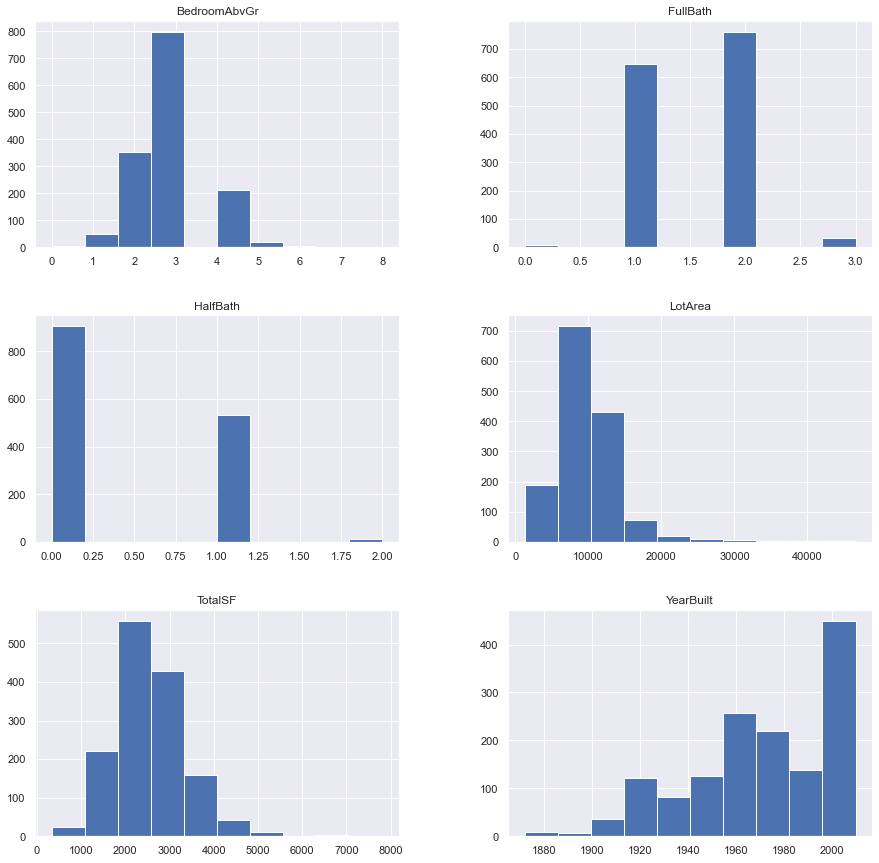

In [91]:
X.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2BFD70C40>]],
      dtype=object)

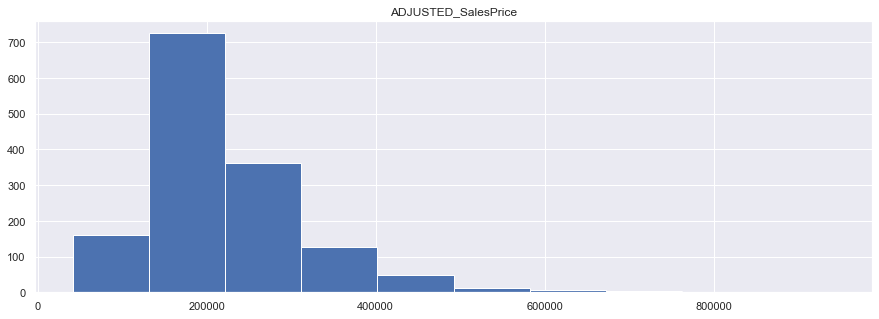

In [92]:
Y.hist(figsize=(15,5))

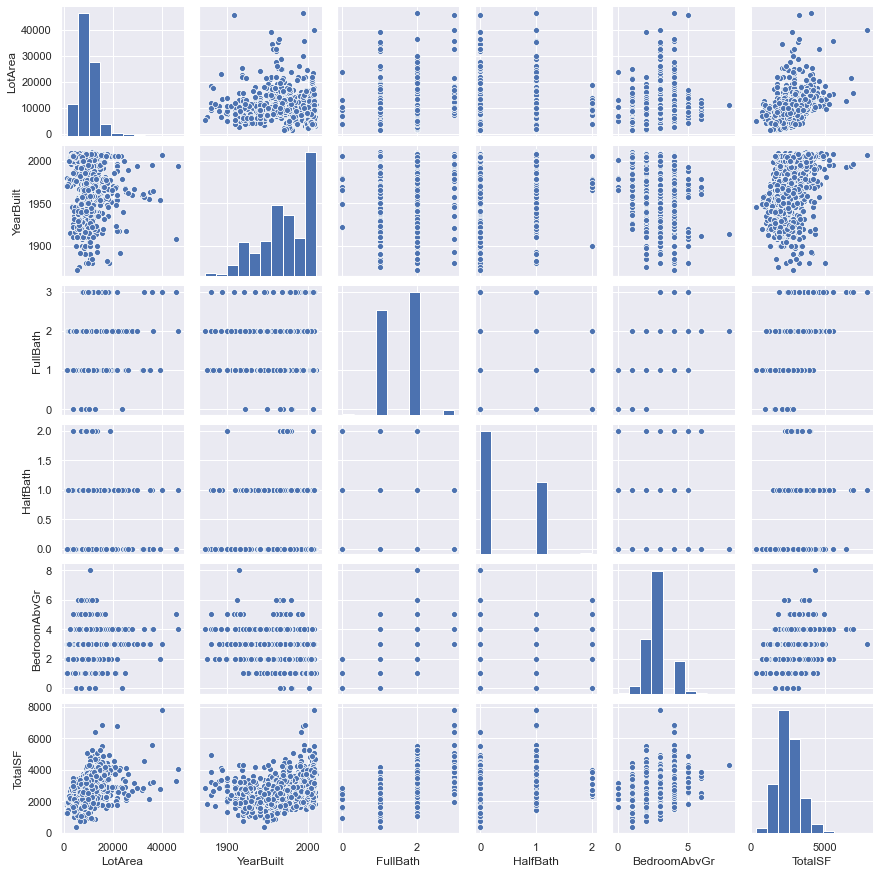

In [93]:
sns.pairplot(X[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF']], height=2)

### Split the data into train and test

In [94]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1159, 8)
(290, 8)
(1159, 1)
(290, 1)


In [95]:
num_features =['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF']
cat_features = ['HouseStyle','BldgType']

## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

In [96]:
# any missing values?
X_train.isnull().sum()

LotArea         0
BldgType        0
HouseStyle      0
YearBuilt       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotalSF         0
dtype: int64

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Create the preprocessing pipeline for numerical features
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        #('poly',PolynomialFeatures(degree =2)),  # we will tune differet strategies later
        ('scaler', StandardScaler())
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: one hot encoding

cat_pipeline = Pipeline(
    steps=[
                ('onehot', OneHotEncoder())
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

## Model traning, tuning, evaluation and selection

Next, we attach three different models (Linear, Ridge, XGBoost) to the same pre-processing pipeline and tune the some parameters using GridSearch with cross validation. Then, we compare their performance and choose the best model to proceed. 

### Using Linear Regression

In [98]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# try Linear Regression
from sklearn.linear_model import LinearRegression

# rf pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression()),
])

parameters_lr=[
    {
        'classifier__fit_intercept': [True,False],
        'classifier__copy_X': [True, False],
        'classifier__normalize': [True, False]
    }
]                 

grid_search_lr = GridSearchCV(pipeline_lr,parameters_lr, cv=2)

In [99]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotalSF']),
                                                                        ('cat_pipeline',
               

In [100]:
# check the best performing parameter combination
grid_search_lr.best_params_

{'classifier__copy_X': True,
 'classifier__fit_intercept': True,
 'classifier__normalize': True}

In [101]:
# build-in CV results keys
sorted(grid_search_lr.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_classifier__copy_X',
 'param_classifier__fit_intercept',
 'param_classifier__normalize',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [102]:
# best linear regression model test score
grid_search_lr.best_score_

0.7541336100134259

### Using Ridge Regression

In [103]:
from sklearn.linear_model import Ridge

# rf pipeline
pipeline_rg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_RG', Ridge()),
])

parameters_rg=[
    {
        'clf_RG__alpha': [0,0.2,0.01,1.0],
        'clf_RG__copy_X': [True, False],
        'clf_RG__fit_intercept': [True, False]
    }
]                 

grid_search_rg = GridSearchCV(pipeline_rg,parameters_rg, cv=5)

In [104]:
grid_search_rg.fit(X_train, y_train)

C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13317e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84784e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.98971e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43377e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90397e-18): result may not be accurate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotalSF']),
                                                                        ('cat_pipeline',
               

In [105]:
# best linear regression model test score
grid_search_rg.best_score_

0.750280991518333

### Using XGBoost Regressor

In [106]:
# XGBoost pipeline
pipeline_xg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_XG', xgb.XGBRegressor()),
])

parameters_xg=[
    {
        'clf_XG__max_depth': [5,10,15,20,25,30],
        'clf_XG__learning_rate': [0.001,0.01,0.1,0.5],
        'clf_XG__n_estimators': [100,150,200,250,300]

    }
]                 

grid_search_xg = GridSearchCV(pipeline_xg,parameters_xg, cv=5)

In [107]:
grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotalSF']),
                                                                        ('cat_pipeline',
               

In [108]:
grid_search_xg.best_score_

0.7913322268495161

- Comparing Best Score among <b>Linear Regression</b> , <b>Ridge Regression</b> and <b> XGBoost Regressor </b>

In [109]:
# best test score
print('best linear regression score is: ', grid_search_lr.best_score_)
print('best Ridge regression score is: ', grid_search_rg.best_score_)
print('best XGBoost  score is: ', grid_search_xg.best_score_)

best linear regression score is:  0.7541336100134259
best Ridge regression score is:  0.750280991518333
best XGBoost  score is:  0.7913322268495161


In [110]:
# best parameters for all three are:
print('best parameter for linear regression are: ', grid_search_lr.best_params_)
print('best Ridge regression regression are: ', grid_search_rg.best_params_)
print('best XGBoost regression are: ', grid_search_xg.best_params_)

best parameter for linear regression are:  {'classifier__copy_X': True, 'classifier__fit_intercept': True, 'classifier__normalize': True}
best Ridge regression regression are:  {'clf_RG__alpha': 1.0, 'clf_RG__copy_X': True, 'clf_RG__fit_intercept': True}
best XGBoost regression are:  {'clf_XG__learning_rate': 0.1, 'clf_XG__max_depth': 5, 'clf_XG__n_estimators': 100}


In [130]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_xg.best_estimator_

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good

#print('Accuracy Score :' (accuracy_score(y_test, y_pred)))

In [133]:
#===========   R-square and other metrics ===================
r_square= metrics.r2_score(y_test, y_pred)
mae_y = metrics.mean_absolute_error(y_test, y_pred)
mse_y = metrics.mean_squared_error(y_test, y_pred)
rmse_y = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("XGBoost::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square,mae_y,mse_y,rmse_y))

Linear::r_square=0.8352126393976549::mean_absolute_error=22654.025918222236::mean_square_error=1278923311.4584296::sqrt_mean_square_error=35762.03729457299::


## Feature Importance

Given that we are using pipeline and one-hot encoding, the feature importance scores are not very straightforward to get. The following code shows how to get the feature importance scores from the Linear regression and create a plot.

In [134]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['LotArea', 'YearBuilt', 'FullBath',
                                   'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('onehot', OneHotEncoder())]),
                                  ['HouseStyle', 'BldgType'])]),
 'clf_XG': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,

In [135]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['HouseStyle', 'BldgType'])])

In [138]:
i = clf_best.named_steps['clf_XG'].feature_importances_
i

array([0.02137149, 0.11683018, 0.04166465, 0.02612636, 0.01796485,
       0.5045914 , 0.01623027, 0.00478958, 0.02999095, 0.        ,
       0.01042238, 0.04398854, 0.00322905, 0.02241252, 0.05995681,
       0.00544456, 0.0392527 , 0.01324267, 0.02249104], dtype=float32)

In [139]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder())]),
  ['HouseStyle', 'BldgType'])]

In [140]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['HouseStyle', 'BldgType'])])

In [141]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder())]),
  ['HouseStyle', 'BldgType'])]

In [142]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']

In [143]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['HouseStyle', 'BldgType']

In [144]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE']

In [146]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['LotArea',
 'YearBuilt',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotalSF',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE']

In [147]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
LotArea,0.021371
YearBuilt,0.116830
FullBath,0.041665
HalfBath,0.026126
BedroomAbvGr,0.017965
TotalSF,0.504591
HouseStyle_1.5Fin,0.016230
HouseStyle_1.5Unf,0.004790
HouseStyle_1Story,0.029991
HouseStyle_2.5Fin,0.000000


In [148]:
r.sort_values('importance', ascending=False)

,importance
TotalSF,0.504591
YearBuilt,0.116830
BldgType_1Fam,0.059957
HouseStyle_2Story,0.043989
FullBath,0.041665
BldgType_Duplex,0.039253
HouseStyle_1Story,0.029991
HalfBath,0.026126
BldgType_TwnhsE,0.022491
HouseStyle_SLvl,0.022413


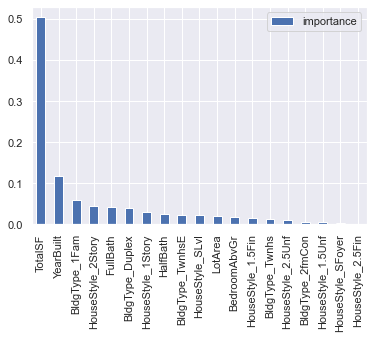

In [149]:
r.sort_values('importance', ascending=False).plot.bar()

## Remove unimportant Features

## Persists the model

In [151]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "Housing.pickle")

['Housing.pickle']

In [152]:
# Load the model from a pickle file
saved_linear_clf = joblib.load("Housing.pickle")
saved_linear_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'YearBuilt',
                                                   'FullBath', 'HalfBath',
                                                   'BedroomAbvGr', 'TotalSF']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['HouseStyle',
                                                   'BldgType'])])),
                ('clf_XG',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsam...
            

In [ ]:
#Load Test Data
testhousingData=pd.read_csv('Data/test.csv')
testhousingData.head()

testhousingData.head()
testhousingData_df=testhousingData[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr']].copy() #,'

In [ ]:
pred1 = saved_linear_clf.predict(testhousingData_df)

In [ ]:
pred1

## Test Datasets

In [158]:
newark_df=pd.read_csv('Data/Delaware - Newark.csv')
newark_df.columns.tolist()

['primary_photo/href',
 'last_update_date',
 'source/plan_id',
 'source/agents/0/office_name',
 'source/agents/1/office_name',
 'source/spec_id',
 'source/type',
 'tags/0',
 'tags/1',
 'tags/2',
 'tags/3',
 'tags/4',
 'tags/5',
 'tags/6',
 'tags/7',
 'tags/8',
 'tags/9',
 'tags/10',
 'tags/11',
 'tags/12',
 'tags/13',
 'tags/14',
 'tags/15',
 'tags/16',
 'tags/17',
 'tags/18',
 'tags/19',
 'tags/20',
 'tags/21',
 'tags/22',
 'tags/23',
 'tags/24',
 'tags/25',
 'tags/26',
 'tags/27',
 'permalink',
 'status',
 'list_date',
 'open_houses',
 'description/year_built',
 'description/baths_3qtr',
 'description/sold_date',
 'description/sold_price',
 'description/baths_full',
 'description/name',
 'description/baths_half',
 'description/lot_sqft',
 'description/sqft',
 'description/baths',
 'description/sub_type',
 'description/baths_1qtr',
 'description/garage',
 'description/stories',
 'description/beds',
 'description/type',
 'branding/0/name',
 'branding/0/photo',
 'branding/0/type',
 'lis

In [159]:
bear_df=pd.read_csv('Data/Delaware - Bear.csv')
bear_df.head()

,primary_photo/href,last_update_date,source/plan_id,source/agents/0/office_name,source/agents/1/office_name,source/spec_id,source/type,tags/0,tags/1,tags/2,...,photos/4/tags/2/label,photos/4/tags/2/probability,photos/4/href,photos/1/tags,photos/2/tags,photos/3/tags,photos/4/tags,photos/0/tags,location/address/coordinate,location/county
0,https://ap.rdcpix.com/17d579e0422ad6eddad32cf8...,2021-06-26T00:07:05Z,NaN,NaN,NaN,NaN,mls,central_air,community_outdoor_space,community_park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://ap.rdcpix.com/c5203540df21e416faf521fd...,2021-06-24T00:02:04Z,NaN,Concord Realty Group,NaN,NaN,mls,central_air,community_outdoor_space,den_or_office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://ap.rdcpix.com/40510892f3ac918357a54a33...,2021-06-21T12:52:11Z,NaN,Patterson-Schwartz-Hockessin,NaN,NaN,mls,central_air,community_clubhouse,community_outdoor_space,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://ap.rdcpix.com/1309648972d5426a39b8b0b2...,2021-06-22T15:20:06Z,NaN,NaN,NaN,NaN,mls,central_air,community_outdoor_space,cul_de_sac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://ap.rdcpix.com/455c360f8cdcc6eed32837ad...,2021-06-22T00:02:32Z,NaN,"Long & Foster Real Estate, Inc.",NaN,NaN,mls,central_air,community_outdoor_space,dining_room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wilmigton_df=pd.read_csv('Data/Delaware - Wilmington.csv')
wilmigton_df.head()

In [ ]:
ames_df=pd.read_csv('Data/IA - Ames.csv')
ames_df.head()